In [1]:
import pandas as pd
import geopandas as gpd

In [2]:
krs_path = "VG250_KRS.shp"

krs= gpd.read_file(krs_path)

krs = krs.to_crs({'init': 'epsg:4326'})
krs = krs[krs.GF==4].copy()

In [3]:
krs.head()

,ADE,GF,BSG,RS,AGS,SDV_RS,GEN,BEZ,IBZ,BEM,...,SN_V1,SN_V2,SN_G,FK_S3,NUTS,RS_0,AGS_0,WSK,DEBKG_ID,geometry
0,4,4,1,01001,01001,010010000000,Flensburg,Kreisfreie Stadt,40,--,...,00,00,000,R,DEF01,010010000000,01001000,2008-01-01,DEBKGDL20000002R,"POLYGON ((9.412664108896106 54.82264090832692,..."
1,4,4,1,01002,01002,010020000000,Kiel,Kreisfreie Stadt,40,--,...,00,00,000,R,DEF02,010020000000,01002000,2006-01-01,DEBKGDL20000E43X,"POLYGON ((10.16915818579685 54.43137670797368,..."
2,4,4,1,01003,01003,010030000000,Lübeck,Kreisfreie Stadt,40,--,...,00,00,000,R,DEF03,010030000000,01003000,2006-02-01,DEBKGDL20000DYM9,"POLYGON ((10.87683500018058 53.98736518615582,..."
3,4,4,1,01004,01004,010040000000,Neumünster,Kreisfreie Stadt,40,--,...,00,00,000,R,DEF04,010040000000,01004000,1970-04-26,DEBKGDL20000E4KX,"POLYGON ((9.995446122384308 54.14971926107452,..."
4,4,4,1,01051,01051,010510044044,Dithmarschen,Kreis,42,--,...,00,00,000,R,DEF05,010510000000,01051000,2011-08-01,DEBKGDL20000E14G,(POLYGON ((9.074024923554102 54.36276991647026...


In [4]:
len(krs)

401

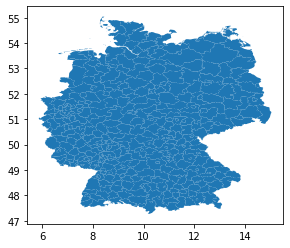

In [6]:
krs.plot()

In [7]:
##### DATA #####

In [8]:
path_elzt="elterngeld-leistungsbezuege-wohnsitz-kreisebene-j-5229211187005.xlsx"

elzt= pd.read_excel(path_elzt, sheet_name ="TabA_Wohnsitz")

elzt[:10]

,Beziehende im Jahr 2018 nach Kreisen,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Beziehende im Jahr 2018 nach Kreisen.1,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,Tabelle A: Leistungsbezüge nach Art der Leis...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Tabelle A: Leistungsbezüge nach Art der Leis...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Land\nRegierungsbezirk/Stat. Region/Direktions...,Leistungs-\nbezieher\ninsgesamt,Art der Leistung,NaN,NaN,NaN,NaN,NaN,Erwerbstätigkeit,NaN,...,NaN,Durchschnittliche (voraussichtliche) Bezugsdauer,NaN,NaN,NaN,NaN,NaN,Väter mit einer\nBezugsdauer\ndes Elterngeldes...,Land\nRegierungsbezirk/Stat. Region/Direktions...,NaN
3,NaN,NaN,Mütter,NaN,NaN,Väter,NaN,NaN,Mütter,NaN,...,NaN,von Müttern zusammen,davon,NaN,von Vätern zusammen,davon,NaN,NaN,NaN,NaN
4,NaN,NaN,zusammen,mit Elterngeld Plus 1,NaN,zusammen,mit Elterngeld Plus 1,NaN,vor der Geburt erwerbstätig 2,NaN,...,NaN,NaN,vor der Geburt\nerwerbstätig 2,vor der Geburt\nnicht erwerbstätig 2,NaN,vor der Geburt\nerwerbstätig 2,vor der Geburt\nnicht erwerbstätig 2,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,Anzahl,NaN,Anteil an\nSpalte 2\nin %,Anzahl,NaN,Anteil an\nSpalte 5\nin %,Anteil an\nSpalte 2\nin %,durchschn.\nEinkommen\nvor der Geburt\nin Euro,...,durchschn.\nEinkommen\nvor der Geburt\nin Euro,Monate,NaN,NaN,NaN,NaN,NaN,Anteil an\nSpalte 5\nin %,NaN,NaN
7,NaN,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,NaN,NaN
8,Baden-Württemberg,249403,184992,55126,29.7991,64411,6775,10.5184,73.5383,1504,...,2278,14.1,14.5,13.3,3.1,3,5.3,78.8732,NaN,Baden-Württemberg
9,Regierungsbezirk Stuttgart,96009,70623,20601,29.1704,25386,2344,9.23344,73.0045,1541,...,2334,14.1,14.4,13.3,3,2.9,5.4,80.8044,NaN,Regierungsbezirk Stuttgart


In [9]:
elzt_cols= elzt[elzt.columns[[0,2,5]]].copy()

In [10]:
elzt_cols =elzt_cols.rename({'Beziehende im Jahr 2018 nach Kreisen': "lks", 'Unnamed: 2': "frauen", 'Unnamed: 5': "maenner"}, axis='columns')

In [11]:
elzt_= elzt_cols[8:452].copy()

In [12]:
elzt_['ags']=elzt_.lks.str[:5]

In [13]:

#update values for city-states
#elzt_[elzt_.lks=="Berlin"]
elzt_.loc[elzt_.lks=="Berlin", 'ags'] = "11000"
elzt_.loc[elzt_.lks=="Hamburg", 'ags'] = "02000"

In [14]:
elzt_clean =elzt_[elzt_.ags.str.isnumeric()].copy()

In [15]:
elzt_clean.head()

,lks,frauen,maenner,ags
10,08111 (kS) Stuttgart,10739,4308,08111
11,08121 (kS) Heilbronn,2315,622,08121
12,08115 (LK) Böblingen,6998,2644,08115
13,08116 (LK) Esslingen,8853,3156,08116
14,08117 (LK) Göppingen,4260,1187,08117


In [16]:
########################### JOIN #####################################

In [17]:
join_el= krs.merge(elzt_clean, right_on='ags',left_on='RS', how='left')

In [18]:
join_el.head()

,ADE,GF,BSG,RS,AGS,SDV_RS,GEN,BEZ,IBZ,BEM,...,NUTS,RS_0,AGS_0,WSK,DEBKG_ID,geometry,lks,frauen,maenner,ags
0,4,4,1,01001,01001,010010000000,Flensburg,Kreisfreie Stadt,40,--,...,DEF01,010010000000,01001000,2008-01-01,DEBKGDL20000002R,"POLYGON ((9.412664108896106 54.82264090832692,...",01001 (kS) Flensburg,1616,358,01001
1,4,4,1,01002,01002,010020000000,Kiel,Kreisfreie Stadt,40,--,...,DEF02,010020000000,01002000,2006-01-01,DEBKGDL20000E43X,"POLYGON ((10.16915818579685 54.43137670797368,...",01002 (kS) Kiel,4274,1287,01002
2,4,4,1,01003,01003,010030000000,Lübeck,Kreisfreie Stadt,40,--,...,DEF03,010030000000,01003000,2006-02-01,DEBKGDL20000DYM9,"POLYGON ((10.87683500018058 53.98736518615582,...",01003 (kS) Lübeck,3506,984,01003
3,4,4,1,01004,01004,010040000000,Neumünster,Kreisfreie Stadt,40,--,...,DEF04,010040000000,01004000,1970-04-26,DEBKGDL20000E4KX,"POLYGON ((9.995446122384308 54.14971926107452,...",01004 (kS) Neumünster,1283,203,01004
4,4,4,1,01051,01051,010510044044,Dithmarschen,Kreis,42,--,...,DEF05,010510000000,01051000,2011-08-01,DEBKGDL20000E14G,(POLYGON ((9.074024923554102 54.36276991647026...,01051 (LK) Dithmarschen,1955,325,01051


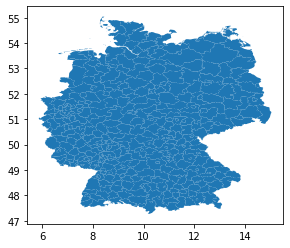

In [19]:
join_el.plot()

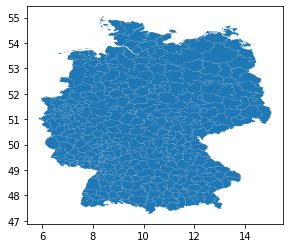

In [20]:
join_el_simp= join_el.simplify(0.01)
join_el_simp.plot()

In [21]:
result = join_el.copy()
result['geometry']=join_el_simp

In [22]:
result['share']=result['maenner']/result['frauen']

In [23]:
result['share_per']=result['share'].apply(lambda n: '{:,.2%}'.format(n))

In [24]:
import folium


import branca

#colorscale = branca.colormap.linear.YlOrRd_09.scale((join_el.share).min(), (join_el.share).max())
#colorscale = branca.colormap.linear.RdOrYl.scale((join_el.share).min(), (join_el.share).max())
colorscale = branca.colormap.LinearColormap(['red','yellow','green'], index=None, vmin=(result.share).min(), vmax=(result.share).max(), caption='')


def style_function(feature):
    col=feature['properties']['share']
    return {
        'fillOpacity': 0.5,
        'weight': 0,
        'fillColor': 'grey' if col is None else colorscale(col)
    }

m = folium.Map(location=[51, 12], zoom_start=6)

folium.GeoJson(
    result,
    name='elternzeit',
    tooltip=folium.GeoJsonTooltip(fields=['GEN','frauen','maenner','share_per',],
                                  aliases=['Kreis','Frauen','Männer','Anteil']),
    style_function=style_function
).add_to(m)

m

In [25]:
m.save('elternzeit_2018_gender.html')
